In [1]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display



In [2]:
# taking data from keggle site available in csv format 

filepath = "keggle_emails.csv"
# Read the data into a pandas dataframe called emails

emails = pd.read_csv(filepath)

headers = [header for header in emails.columns]

print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))

print(display(emails.head()))

Successfully loaded 517401 rows and 2 columns!


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700..."
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ..."
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700..."
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700..."
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700..."


None


In [3]:
# checking message of Third file

print(emails.loc[25]["message"])

Message-ID: <19034252.1075855687825.JavaMail.evans@thyme>
Date: Tue, 26 Sep 2000 09:28:00 -0700 (PDT)
From: phillip.allen@enron.com
To: kholst@enron.com
Subject: Investment Structure
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: kholst@enron.com
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/26/2000 
04:28 PM ---------------------------


"George Richards" <cbpres@austin.rr.com> on 09/26/2000 01:18:45 PM
Please respond to <cbpres@austin.rr.com>
To: "Phillip Allen" <pallen@enron.com>
cc: "Larry Lewter" <retwell@mail.sanmarcos.net>, "Claudia L. Crocker" 
<clclegal2@aol.com> 
Subject: Investment Structure


STRUCTURE:
Typically the structure is a limited partnership with a corporate (or LLC)
general partner.  The General Partner owns 1% of the project and carries the
liability of c

 ### Features and Label
 
Headers such as To, Subject, From and the message body are used as features. The X-Folder contains the label. All the features are in strings will need to be converted into numerical format for the computer to interpret them.

In [4]:
import email

def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To", "X-cc", "X-bc", "X-Origin"]    
headers = get_headers(emails, header_names)

Successfully retrieved header information!


In [5]:
# extracting message from data and adding new feature of message_body to data

def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages
msg_body = get_messages(emails)
emails["Message-Body"] = msg_body

Successfully retrieved message body from e-mails!


In [6]:
emails.head(3)

,file,message,Message-Body
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ...",traveling to have a business meeting takes the fun out of the trip. especially if you have to p...
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700...",test successful. way to go!!!


In [7]:
# adding employee name to data

x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])

print(x_from.iloc[:1000]["X-From"].unique()[:10])

if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')


['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [8]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])

Successfully added new column!


In [9]:
emails.head(3)

,file,message,Message-Body,X-From,employee
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ...",traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700...",test successful. way to go!!!,Phillip K Allen,allen-p


In [10]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df

remaining_headers = ["Date", "Subject", "X-Folder", "X-To", "X-cc", "X-bc", "X-Origin"] 

emails = add_headers(df = emails, header_list = remaining_headers)

In [11]:
'''messages = list(map(email.message_from_string, emails['message']))

keys = messages[0].keys()
for key in keys:
    emails[key] = [doc[key] for doc in messages]'''

"messages = list(map(email.message_from_string, emails['message']))\n\nkeys = messages[0].keys()\nfor key in keys:\n    emails[key] = [doc[key] for doc in messages]"

In [12]:
emails.head(20)

,file,message,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-bc,X-Origin
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,,None,Allen-P
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ...",traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,,None,Allen-P
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700...",test successful. way to go!!!,Phillip K Allen,allen-p,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,,None,Allen-P
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700...","randy,\n\n can you send me a schedule of the salary and level of everyone in the \nscheduling gr...",Phillip K Allen,allen-p,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,,None,Allen-P
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700...",let's shoot for tuesday at 11:45.,Phillip K Allen,allen-p,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,,None,Allen-P
5,allen-p/_sent_mail/1002.,"Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 04:17:00 -0700...","greg,\n\n how about either next tuesday or thursday?\n\nphillip",Phillip K Allen,allen-p,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,,None,Allen-P
6,allen-p/_sent_mail/1003.,"Message-ID: <16254169.1075863688286.JavaMail.evans@thyme>\nDate: Tue, 22 Aug 2000 07:44:00 -0700...",please cc the following distribution list with updates:\n\nphillip allen (pallen@enron.com)\nmik...,Phillip K Allen,allen-p,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"david.l.johnson@enron.com, John Shafer",,None,Allen-P
7,allen-p/_sent_mail/1004.,"Message-ID: <17189699.1075863688308.JavaMail.evans@thyme>\nDate: Fri, 14 Jul 2000 06:59:00 -0700...",any morning between 10 and 11:30,Phillip K Allen,allen-p,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",Re: PRC review - phone calls,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Joyce Teixeira,,None,Allen-P
8,allen-p/_sent_mail/101.,"Message-ID: <20641191.1075855687472.JavaMail.evans@thyme>\nDate: Tue, 17 Oct 2000 02:26:00 -0700...",1. login: pallen pw: ke9davis\n\n i don't think these are required by the isp \n\n 2. static ...,Phillip K Allen,allen-p,"Tue, 17 Oct 2000 02:26:00 -0700 (PDT)",Re: High Speed Internet Access,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Mark Scott,,None,Allen-P
9,allen-p/_sent_mail/102.,"Message-ID: <30795301.1075855687494.JavaMail.evans@thyme>\nDate: Mon, 16 Oct 2000 06:44:00 -0700...",---------------------- forwarded by phillip k allen/hou/ect on 10/16/2000 \n01:42 pm -----------...,Phillip K Allen,allen-p,"Mon, 16 Oct 2000 06:44:00 -0700 (PDT)",FW: fixed forward or other Collar floor gas price terms,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,zimam@enron.com,,None,Allen-P


In [13]:
emails.dtypes

file            object
message         object
Message-Body    object
X-From          object
employee        object
Date            object
Subject         object
X-Folder        object
X-To            object
X-cc            object
X-bc            object
X-Origin        object
dtype: object

In [14]:
emails['Subject'].isna().sum()

0

In [15]:
emails['employee'].value_counts()

kaminski-v         28465
dasovich-j         28234
kean-s             25351
mann-k             23381
jones-t            19950
shackleton-s       18687
taylor-m           13875
farmer-d           13032
germany-c          12436
beck-s             11830
symes-k            10827
nemec-g            10655
scott-s             8022
rogers-b            8009
bass-e              7823
sanders-r           7329
campbell-l          6490
shapiro-r           6071
guzman-m            6054
lay-k               5937
lenhart-m           5920
lokay-m             5568
kitchen-l           5546
haedicke-m          5246
sager-e             5200
love-p              5002
arnold-j            4898
fossum-d            4796
perlingiere-d       4778
lavorato-j          4685
mcconnell-m         4542
giron-d             4220
skilling-j          4139
shankman-j          3856
hain-m              3820
delainey-d          3566
williams-w3         3440
blair-l             3415
mclaughlin-e        3353
whalley-l           3335


In [16]:
emails['X-From'].value_counts()

Kay Mann                                                                                          16324
Vince J Kaminski                                                                                  14367
Jeff Dasovich                                                                                      9701
Enron Announcements                                                                                8535
Tana Jones                                                                                         8105
                                                                                                  ...  
"marl552@aol.com" <marl552@aol.com>@ENRON                                                             1
carrigan34@deseretmail.com@ENRON <IMCEANOTES-carrigan34+40deseretmail+2Ecom+40ENRON@ENRON.com>        1
Suchman, Mark C  <Mark.Suchman@bakerpetrolite.com>                                                    1
Brad Heller <energyseminars@energyseminars.com>@ENRON           

In [17]:
emails.isna().sum()

file                 0
message              0
Message-Body         0
X-From              29
employee             0
Date                 0
Subject              0
X-Folder            29
X-To                29
X-cc                29
X-bc            517401
X-Origin            29
dtype: int64

In [18]:
emails.Subject.value_counts()

                                                         19187
RE:                                                       6477
Re:                                                       6306
Demand Ken Lay Donate Proceeds from Enron Stock Sales     1124
FW:                                                        938
                                                         ...  
info re bank                                                 1
FW: Hola mi primo!                                           1
follow up call to Churchill                                  1
Brown Bag/Capacity Release & Internet Activity               1
FW: EES Natural Gas Market Discussions                       1
Name: Subject, Length: 159290, dtype: int64

In [19]:
#Convert date column to datetime 

emails["Date"] = pd.to_datetime(emails["Date"])

In [20]:
emails['Date'] = pd.to_datetime(emails['Date'], infer_datetime_format=True, utc=True)

In [21]:
emails.sort_values('Date', ascending=False).head(3)


,file,message,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-bc,X-Origin
517039,zufferli-j/inbox/quotes/33.,"Message-ID: <21511287.1075842027020.JavaMail.evans@thyme>\nDate: Mon, 4 Jan 2044 14:48:58 -0800 ...","\nhowdy, \nbom went out 35 at 35.5 \nfeb traded 32.75 and 33 \nmar 33 ,(away) , 33.5, 33.75 , an...","""Erik Cramer"" <cramer@cadvision.com>@ENRON",zufferli-j,2044-01-04 22:48:58+00:00,trades,"\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",,None,ZUFFERLI-J
517040,zufferli-j/inbox/quotes/35.,"Message-ID: <9293997.1075842027067.JavaMail.evans@thyme>\nDate: Mon, 4 Jan 2044 08:59:46 -0800 (...","\nbom 5th to 31st traded 34, 33.5 , 33.5 and 34 \nfeb traded 34.5 away. \nq2 traded 32 and 31....","""Erik Cramer"" <cramer@cadvision.com>@ENRON",zufferli-j,2044-01-04 16:59:46+00:00,Trades,"\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",,None,ZUFFERLI-J
517042,zufferli-j/inbox/quotes/38.,"Message-ID: <15177697.1075842027136.JavaMail.evans@thyme>\nDate: Sat, 2 Jan 2044 15:46:00 -0800 ...",\nfeb dec trades 37.5 \nfeb dec ll went out 20 at 24 (did not have bid but heard elswhere)\nfeb...,"""Erik Cramer"" <cramer@cadvision.com>@ENRON",zufferli-j,2044-01-02 23:46:00+00:00,trades jan 2002,"\ExMerge - Zufferli, John\Inbox\Quotes","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",,None,ZUFFERLI-J


In [22]:
emails.Date.dtypes

datetime64[ns, UTC]

### Exchange of Mails

Text(0, 0.5, 'N emails')

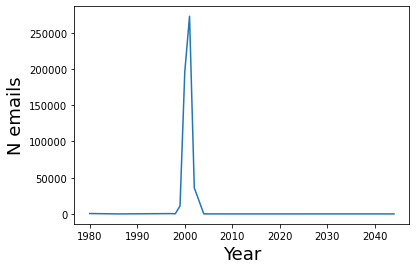

In [23]:
# Yearly
ax_yr = emails.groupby(emails['Date'].dt.year)['Message-Body'].count().plot()
ax_yr.set_xlabel('Year', fontsize=18)
ax_yr.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

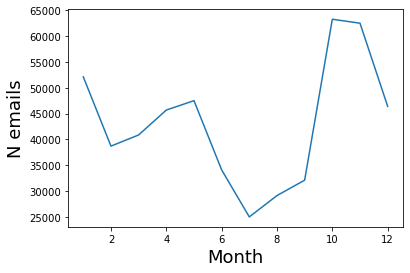

In [24]:
# monthly
ax_mn = emails.groupby(emails['Date'].dt.month)['Message-Body'].count().plot()
ax_mn.set_xlabel('Month', fontsize=18)
ax_mn.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

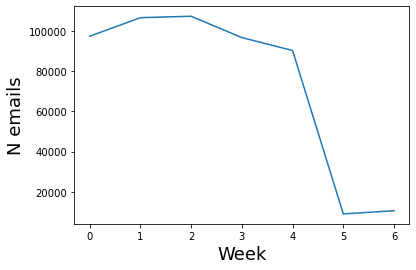

In [25]:
# Weekly

ax_wk = emails.groupby(emails['Date'].dt.dayofweek)['Message-Body'].count().plot()
ax_wk.set_xlabel('Week', fontsize=18)
ax_wk.set_ylabel('N emails', fontsize=18)


Text(0, 0.5, 'N emails')

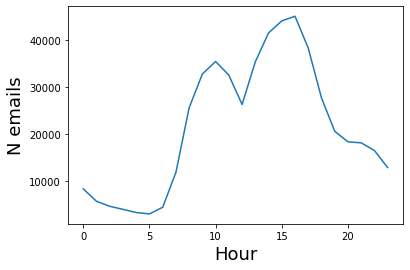

In [26]:
# hourly

ax_hr = emails.groupby(emails['Date'].dt.hour)['Message-Body'].count().plot()
ax_hr.set_xlabel('Hour', fontsize=18)
ax_hr.set_ylabel('N emails', fontsize=18)


In [27]:
emails.to_csv('email.csv',index=False)